# Comprehensive Evaluation of Machine Learning Techniques to Predict Customer Default

Here historical loan application data from Lending Club Loans are used to predict whether or not an applicant will be able to repay a loan. This is a supervised classification task in which, The labels are included in the training data and the model will be trained to predict the labels from the features. 

The label is a binary variable and describe the following situations:
- 0: Customer will repay loan on time
- 1: Customer Default (difficulty repaying loan)


Performances of multiple machine learning classifiers are compared with respect to multiple accuracy metrics including precision, recall and ROC curves.


## Company Information
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.


## The Data

There are many LendingClub data sets on Kaggl. We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club



## List of Sections
[Section 1: Exploratory Data Analysis](#Section-1:-Exploratory-Data-Analysis)

[Section 2: Handling Missing Data and Categorical Variables](#Section-2:-Handling-Missing-Data-and-Categorical-Variables)

[Section 3: Train Test Split and Normalizing Data](#Section-3:-Train-Test-Split-and-Normalizing-Data)

[Section 4: A Review of Accuracy Metrics](#Section-4:-A-Review-of-Accuracy-Metrics)

[Section 5: Random Forest - Ensemble of Decision Trees](#Section-5:-Random-Forest-Ensemble-of-Decision-Trees)

[Section 6: Logistic Regression](#Section-6:-Logistic-Regression)

[Section 7: KNeighborsClassifier](#Section-7:-KNeighborsClassifier)

[Section 8: Extreme Gradient Boost Model](#Section-8:-Extreme-Gradient-Boost-Model)

[Section 9: Naive Bayes Classifier](#Section-9:-Naive-Bayes-Classifier)

[Section 10: Comparison of the Investigated Classifier](#Section-10:-Comparison-of-the-Investigated-Classifier)





## Import necessary libraries.

In [316]:
# import pandas for data (csv) manipulation
import pandas as pd

# import numpy for math calculations
import numpy as np

# import matplotlib for plotting
import matplotlib.pyplot as plt

# import seaborn for more plotting options(built on top of matplotlib)
import seaborn as sns

# display plots on the notebook itself
%matplotlib inline

plt.style.use('ggplot') 

# Supress unnecessary warnings so that the presentation looks clean
import warnings
warnings.filterwarnings("ignore")

<a name="Section-1:-Exploratory-Data-Analysis"></a>
# Section 1: Exploratory Data Analysis

**OVERALL GOAL: Get an understanding of relationship between features, view summary statistics, and visualize the data**


## Data Overview

Following are information on the available features of data set

In [317]:
data_info = pd.read_csv('dataset/lending_club_info.csv',index_col='LoanStatNew')

In [318]:
with pd.option_context('display.max_colwidth', None):
  display(data_info)

,Description
LoanStatNew,
loan_amnt,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
term,The number of payments on the loan. Values are in months and can be either 36 or 60.
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if the loan originates.
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when applying for the loan.*
emp_length,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
home_ownership,"The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER"


In [319]:
def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

## Loading the data

In [320]:
df = pd.read_csv('dataset/lending_club_loan_two.csv')

Let's review the statistic:

In [321]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


**Since we will be attempting to predict loan_status, let's create a countplot to explore its spread.**

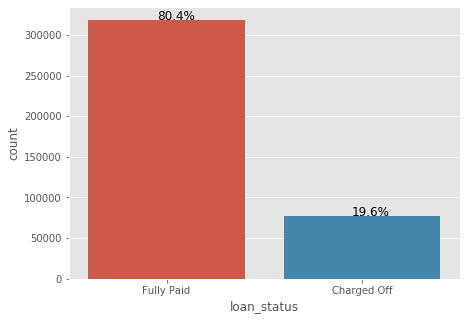

In [322]:
plt.figure(figsize=(7,5))
ax = sns.countplot('loan_status', data = df)
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

**This is clearly an imbalanced dataset. There are more number of people who "Fully Paid" as opposed to people who had difficulties ("Charged Off"). About 80.4 % of applicants repayed!**

**Creating a histogram of the loan_amnt column.**

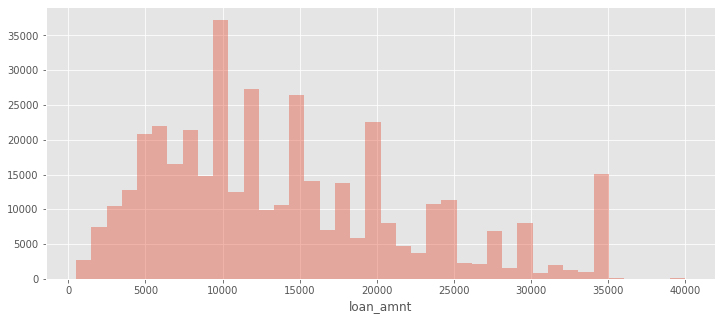

In [323]:
plt.figure(figsize=(12,5))
sns.distplot(df['loan_amnt'], kde=False, bins =40)

## Correlation Between Feature Variables

Let's explore correlation between all continuous numeric feature variables using .corr() method. Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate together. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases.

A correlation coefficient is a statistical measure of the degree to which changes to the value of one variable predict change to the value of another. When the fluctuation of one variable reliably predicts a similar fluctuation in another variable, there’s often a tendency to think that means that the change in one causes the change in the other. However, correlation does not imply causation. There may be, for example, an unknown factor that influences both variables similarly.

![correlation.png](images/correlation.png)

To describe the strength of the
correlation using the guide that Evans (1996) suggests for the absolute value of r:
<br/>
 .00-.19 “very weak”
 <br/>
 .20-.39 “weak”
 <br/>
 .40-.59 “moderate”
 <br/>
 .60-.79 “strong”
 <br/>
 .80-1.0 “very strong”



http://www.statstutor.ac.uk/resources/uploaded/pearsons.pdf <br/>
https://whatis.techtarget.com/definition/correlation

In [324]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


**Utilizing Heatmap to Visualize Correlation Between Feature Variables.**

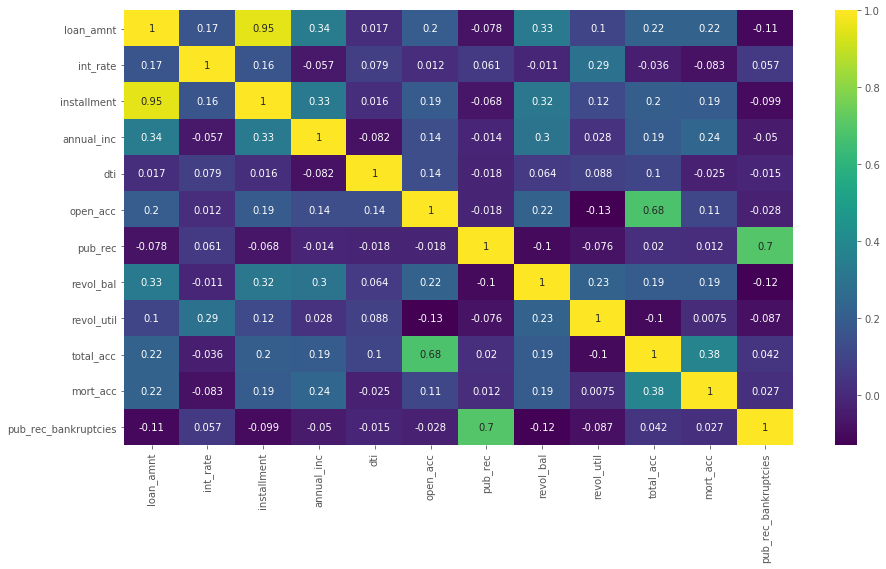

In [326]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, cmap='viridis')

**Almost perfect correlation exists with the "installment" feature. Let's explore this feature further by print out their descriptions and perform a scatterplot between them. Does this relationship indicates duplicate information here?**

In [327]:
feat_info('installment')

The monthly payment owed by the borrower if the loan originates.


In [328]:
feat_info('loan_amnt')

The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


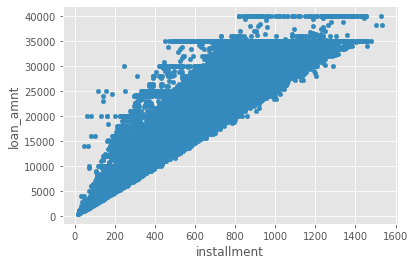

In [329]:
df.plot.scatter('installment', 'loan_amnt' , marker='o')

The above investigation revealed the dependancy of these two features due to their definitions. if an applicant approved for a "loan_amnt", then the "installment" would be the resuting monthly payment. Therefore the feature "installment" can be dropped from the dataset.

In [330]:
df = df.drop('installment',axis=1)

**Creating a boxplot showing the relationship between the loan_status and the Loan Amount.**

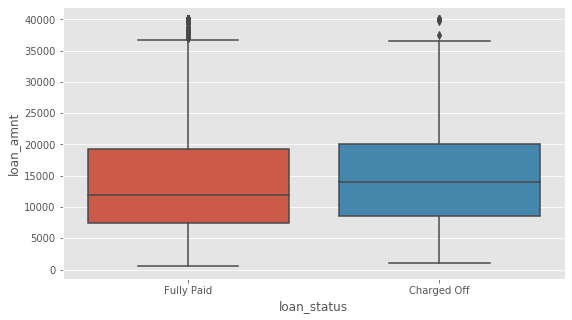

In [331]:
plt.figure(figsize=(9,5))
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

**Let's calculate the summary statistics for the loan amount, grouped by the loan_status.**

In [332]:
df.groupby("loan_status")['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


**Let's explore the Grade and SubGrade columns that LendingClub attributes to the loans. What are the unique possible grades and subgrades?**

In [333]:
sorted(df['grade'].unique())

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [334]:
print(sorted(df['sub_grade'].unique()))

['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']


**Creating a countplot per grade with loan_status label for each grade.**

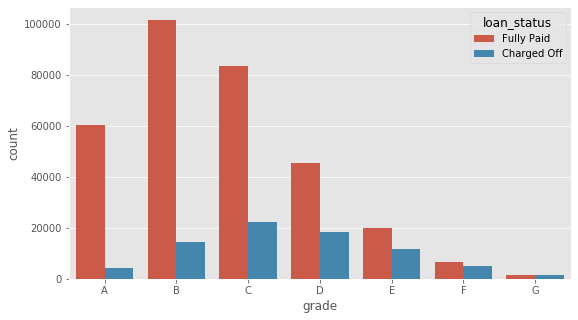

In [335]:
plt.figure(figsize=(9,5))
grade_order = sorted(df['grade'].unique())
sns.countplot(x='grade',data=df , order = grade_order,hue='loan_status')

**Let's display a count plot per subgrade. Exploring all loans made per subgrade as well being separated based on the loan_status**

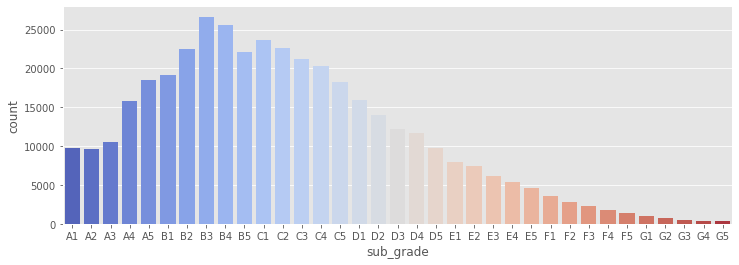

In [336]:
plt.figure(figsize=(12,4))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df, order = sub_grade_order,palette='coolwarm')

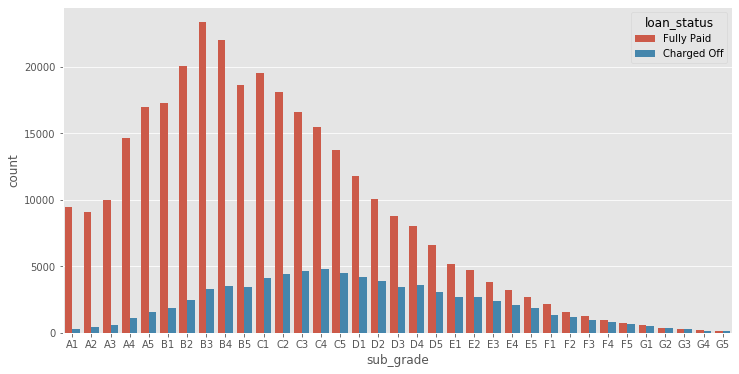

In [341]:
plt.figure(figsize=(12,6))
sub_grade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,hue='loan_status', order = sub_grade_order)

**Apparently,the grade feature is part of sub_grade, so let's just drop the grade feature.**

In [342]:
df = df.drop('grade',axis=1)

**It looks like F and G subgrades don't get paid back that often. Let's isloate those and recreate the countplot just for those subgrades.**

In [343]:
df_f_g = df[df['sub_grade'].apply(lambda x: x[0] in ['F','G'])]

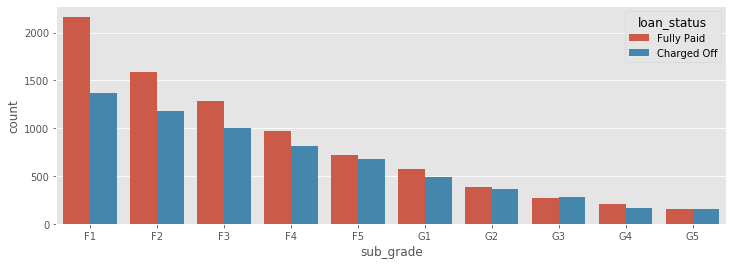

In [344]:
plt.figure(figsize=(12,4))
sub_grade_order = sorted(df_f_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df_f_g,hue='loan_status', order = sub_grade_order)

**Let's create a new column called 'consumer_default' which will contain a 0 if the loan status was "Fully Paid" and a 1 if it was "Charged Off".**

In [345]:
df['consumer_default'] = df['loan_status'].apply(lambda x:1 if (x=="Charged Off") else 0)
#df['consumer_default'] = df['loan_status'].map({'Fully Paid':0,'Charged Off':1})

**Let's drop the load_status column, since its a duplicate of the consumer_default column. We'll use the consumer_default column since its already in 0s and 1s.**

In [346]:
df = df.drop('loan_status',axis=1)

Creating a bar plot showing the correlation of the numeric features to the new consumer_default column.

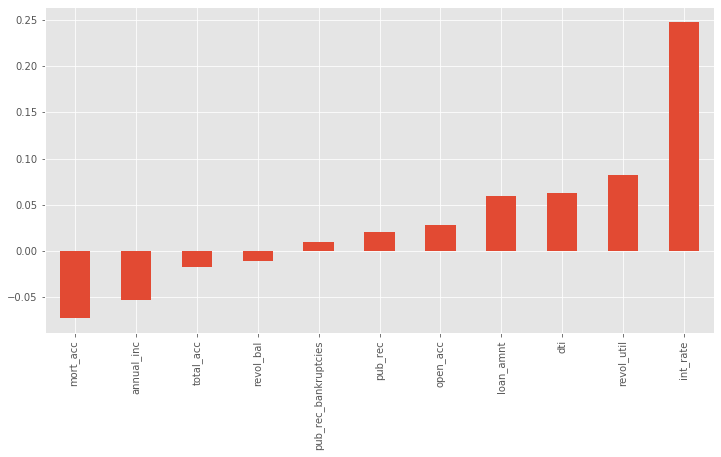

In [347]:
plt.figure(figsize=(12,6))
df.corr()['consumer_default'].sort_values().drop('consumer_default').plot(kind='bar')

---
<a name="Section-2:-Handling-Missing-Data-and-Categorical-Variables"></a>
# Section 2: Handling Missing Data and Categorical Variables


**Objectives: Remove or fill any missing data. Remove unnecessary or repetitive features. Convert categorical string features to dummy variables.**



## Missing Data

**Let's explore missing data columns. We use a variety of factors to decide whether or not they would be useful, to see if we should keep, discard, or fill in the missing data.**

### What are the missing values and their column names?

In [348]:
def missing_columns(dataframe):
    """
    Returns a dataframe that contains missing column names and 
    percent of missing values in relation to the whole dataframe.
    
    dataframe: dataframe that gives the column names and their % of missing values
    """
    
    # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)
    
    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)

    # give new col names
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']
    
    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]
    

In [349]:
missing_columns(df)

,Missing Count,Missing Count Ratio,Missing Count %
mort_acc,37795,0.095435,9.5
emp_title,22927,0.057892,5.8
emp_length,18301,0.046211,4.6
title,1755,0.004431,0.4
pub_rec_bankruptcies,535,0.001351,0.1
revol_util,276,0.000697,0.1


**Let's examine emp_title and emp_length to see whether it will be okay to drop them. Printing out their feature information using the feat_info() function from the top of this notebook.**

In [350]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


**How many unique employment job titles are there?**

In [351]:
df['emp_title'].nunique()

173105

In [352]:
df['emp_title'].value_counts()

Teacher                   4389
Manager                   4250
Registered Nurse          1856
RN                        1846
Supervisor                1830
                          ... 
laredo medical center        1
Flextrade Systems  Inc       1
NJ Treasury Department       1
Master plumber               1
Samuel I White P.C.          1
Name: emp_title, Length: 173105, dtype: int64

**Realistically there are too many unique job titles to try to convert this to a dummy variable feature. Let's remove that emp_title column.**

In [353]:
df = df.drop('emp_title',axis=1)

**Creating a count plot of the emp_length feature column. Challenge: Sort the order of the values.**

In [354]:
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [355]:
emp_length_order = [ '< 1 year',
                      '1 year',
                     '2 years',
                     '3 years',
                     '4 years',
                     '5 years',
                     '6 years',
                     '7 years',
                     '8 years',
                     '9 years',
                     '10+ years']

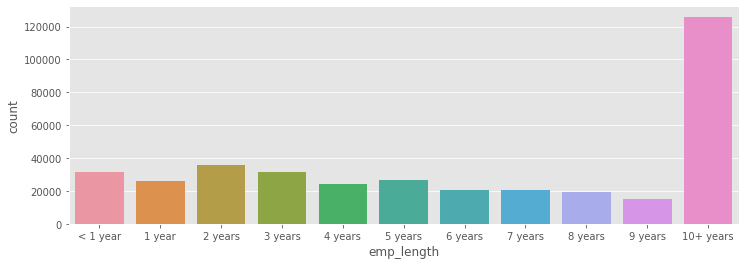

In [356]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data =df, order = emp_length_order)

**Plot out the countplot with a hue separating Fully Paid vs Charged Off**

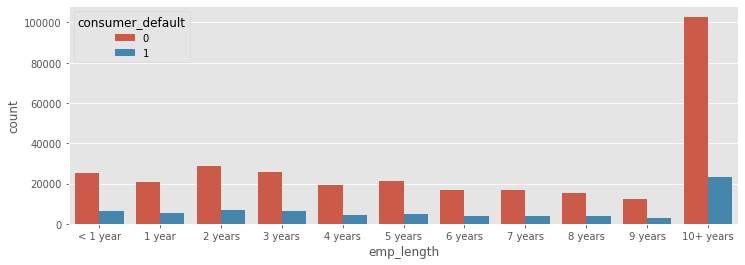

In [357]:
plt.figure(figsize=(12,4))
sns.countplot(x='emp_length', data =df, hue ='consumer_default' , order = emp_length_order)

**This still doesn't really inform us if there is a strong relationship between employment length and being charged off, what we want is the percentage of charge offs per category. Essentially informing us what percent of people per employment category didn't pay back their loan.**

In [358]:
emp_total = df.groupby('emp_length').count()['loan_amnt']
emp_charged_off = df[df['consumer_default']==1].groupby("emp_length").count()['consumer_default']
emp_len_pr_co = 100*emp_charged_off/emp_total
emp_len_pr_co

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
dtype: float64

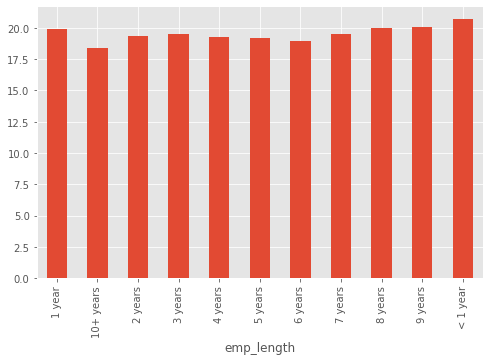

In [359]:
plt.figure(figsize=(8,5))
emp_len_pr_co.plot(kind = 'bar')

**Charge off rates are extremely similar across all employment lengths. So, let's drop the emp_length column.**

In [360]:
df = df.drop('emp_length',axis=1)

**Review the title column vs the purpose column. Is this repeated information?**

In [361]:
df[['title','purpose']].head(10)

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


**The title column is simply a string subcategory/description of the purpose column. Let's drop the title column.**

In [362]:
df = df.drop('title',axis=1)

---
**Let's find out what the mort_acc feature represents**

In [363]:
feat_info('mort_acc')

Number of mortgage accounts.


**Creating a value_counts of the mort_acc column.**

In [364]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

**There are many ways we could deal with this missing data. We could attempt to build a simple model to fill it in, such as a linear model, we could just fill it in based on the mean of the other columns, or even bin the columns into categories and then set NaN as its own category. There is no 100% correct approach! Let's review the other columsn to see which most highly correlates to mort_acc**

In [365]:
print("Correlation with the mort_acc column")
df.corr()['mort_acc'].drop('mort_acc').sort_values()

Correlation with the mort_acc column


int_rate               -0.082583
consumer_default       -0.073111
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
Name: mort_acc, dtype: float64

**Looks like the total_acc feature correlates with the mort_acc , this makes sense! Let's try this fillna() approach. We will group the dataframe by the total_acc and calculate the mean value for the mort_acc per total_acc entry. To get the result below:**

In [366]:
print("Mean of mort_acc column per total_acc")
df.groupby('total_acc').mean()['mort_acc']

Mean of mort_acc column per total_acc


total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

**Let's fill in the missing mort_acc values based on their total_acc value. If the mort_acc is missing, then we will fill in that missing value with the mean value corresponding to its total_acc value from the Series we created above. This involves using an .apply() method with two columns.**

In [367]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [368]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [369]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

**revol_util and the pub_rec_bankruptcies have missing data points, but they account for less than 0.5% of the total data. Go let's remove the rows that are missing those values in those columns with dropna().**

In [370]:
df = df.dropna()

## Categorical Variables and Dummy Variables

**We're done working with the missing data! Now we just need to deal with the string values due to the categorical columns.**

**Let's start with a list of all the columns that are currently non-numeric.**

In [371]:
df.select_dtypes(['object']).columns

Index(['term', 'sub_grade', 'home_ownership', 'verification_status', 'issue_d',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

---
**Let's now go through all the string features to see what we should do with them.**

---


### term feature

**Converting the term feature into either a 36 or 60 integer numeric data type using .apply() or .map().**

In [372]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [373]:
df['term'] = df['term'].apply(lambda term: int(term[:3]))

**Converting the subgrade into dummy variables. Then concatenate these new columns to the original dataframe.**

In [374]:
subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [375]:
df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1)

In [376]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'purpose', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'consumer_default', 'A2', 'A3', 'A4',
       'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1',
       'D2', 'D3', 'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3',
       'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5'],
      dtype='object')

In [377]:
df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type',
       'address'],
      dtype='object')

### verification_status, application_type,initial_list_status,purpose 
**Let's convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables and concatenate them with the original dataframe.**

In [378]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

### home_ownership
**Review of the value_counts for the home_ownership column.**

In [379]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

**Let's convert these to dummy variables, but [replace] NONE and ANY with OTHER, so that we end up with just 4 categories, MORTGAGE, RENT, OWN, OTHER. Then concatenate them with the original dataframe.**

In [380]:
df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

### address
**Let's feature engineer a zip code column from the address in the data set.**

In [381]:
df['zip_code'] = df['address'].apply(lambda x:x.split()[-1])

**Now make this zip_code column into dummy variables using pandas. Concatenate the result and drop the original zip_code column along with dropping the address column.**

In [382]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

### issue_d 

**This would be data leakage, we wouldn't know beforehand whether or not a loan would be issued when using our model, so in theory we wouldn't have an issue_date, drop this feature.**

In [383]:
df = df.drop('issue_d',axis=1)

### earliest_cr_line
**This appears to be a historical time stamp feature. Extract the year from this feature using a .apply function, then convert it to a numeric feature. Set this new data to a feature column called 'earliest_cr_year'.Then drop the earliest_cr_line feature.**

In [384]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

<a name="Section-3:-Train-Test-Split-and-Normalizing-Data"></a>
# Section 3: Train Test Split and Normalizing Data


### OPTIONAL (Grabbing a Sample for Training Time)
OPTIONAL: Use .sample() to grab a sample of the 490k+ entries to save time on training. Highly recommended for lower RAM computers or if you are not using GPU.


In [187]:
print(len(df))
df = df.sample(frac=0.1,random_state=101)
print(len(df))

395219
39522


### Train Test Split

In [188]:
from sklearn.model_selection import train_test_split

**Seting X and y variables to the values of the features and label.**

In [189]:
X = df.drop('consumer_default',axis=1).values
y = df['consumer_default'].values

In [190]:
class_names = ['Fully Paid', 'Consumer Default']
features = list(set(df.columns).difference({'consumer_default'}))

**Perform a train/test split with test_size=0.2 and a random_state of 101.**

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=101)

Fraction of each class in train and test datasets

In [193]:
# show the distribution
print('y_train class distribution')
print(pd.Series(y_train).value_counts(normalize=True))
print('y_test class distribution')
print(pd.Series(y_test).value_counts(normalize=True))


y_train class distribution
0    0.801183
1    0.198817
dtype: float64
y_test class distribution
0    0.801139
1    0.198861
dtype: float64


### Normalizing the Data

**Use a MinMaxScaler to normalize the feature data X_train and X_test. Recall we don't want data leakge from the test set so we only fit on the X_train data.**

In [194]:
from sklearn.preprocessing import MinMaxScaler

In [195]:
scaler = MinMaxScaler()

In [196]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<a name="Section-4:-A-Review-of-Accuracy-Metrics"></a>
# Section 4: A Review of Accuracy Metrics


<b>1.True Positives (TP):</b> True positives are the cases when an actual class of 1(True) is successfully predicted as class 1(True). e.g. the model classify a cencer case when the person is actually having cancer.

<b>2.True Negatives (TN):</b> True negatives are the cases when an actual class of 0(False) is successfully predicted as class 0(False). e.g. a person NOT having cancer and is classified as Not cancer by the model.

<b>3.False Positives (FP):</b> False positives are the cases when the actual class of the data point is 0(False) and the model incorretly predicted the case as 1(True). e.g. a person NOT having cancer is incorrectly classified as a case with cancer by the model.

<b>4.False Negatives (FN):</b> False Negatives are the cases when the actual class of the data point is 1(True) and the model incorretly predicted the case as 0(False). e.g. a person having cancer is incorrectly classified as a case with No-cancer by the model.



### Accuracy:
Accuracy in classification problems is the number of correct predictions made by the model divided by all predictions made.
**Accuracy= (TP + TN) / (P + N)** 
![accuracy.png](images/accuracy.png)

### Precision:
Precision pertains to how precise/accurate the model is, and describes out of those predicted positive, how many of them are actual positive.
**Precision= TP / (TP + FP)** 
![precision.png](images/precision.png)

### Recall - True Positive Rate:
The value of recall explains the percent of the positive cases that are catched by the model (predicted positive) amongst all positive cases. In other words, recall is fraction of captured Actual Positives by the model through labeling them as Positive.
**Recall= TP / (TP+FN)** 
![recall.png](images/recall.png)

### False Positive Rate:
<b>False Positive Rate = False Positives / (False Positives + True Negatives) </b>


### F-1 Score:
The F1 score (also F-score or F-measure) is the harmonic mean of the precision and recall. The F-score can be any number in the range of 1.0 (indicating perfect precision and recall) and 0.0 (if either the precision or the recall is zero). 

**F1-score = (Recall* Precision) / (Recall+Precision)*0.5**  

![f-1%20score.png](images/f-1%20score.png)

### ROC (receiver operating characteristic) Curve:
A curve of true positive rate vs. false positive rate at different classification thresholds which is a plot of the false alarm rate versus the hit rate.

### AUROC (Area under ROC):
AUROC stands for "Area under the ROC Curve" and measures the entire two-dimensional area underneath the entire ROC curve considering all possible classification thresholds. The Area Under the ROC curve is the probability that the model is doing better than a random classifier.


image source : https://medium.com/greyatom/performance-metrics-for-classification-problems-in-machine-learning-part-i-b085d432082b

<a name="Section-5:-Random-Forest-Ensemble-of-Decision-Trees"></a>
# Section 5: Random Forest - Ensemble of Decision Trees

A decision tree is a popular Machine Learning algorithm widely used for fitting complex datasets and performing both classification and regression tasks. To build a tree, the algorithm tries to identify a cutt-off value for features to split dataset accordingly. The algorithm iterates until achieving optimal splitting criteria to create branches and leafs. To make a prediction using a trained decision tree, a new data point will be located in top of the tree (root node) and is transfered along the branches until reaching a leaf node where no further branching is possible.


![random%20forest.png](images/random_forest.png)
image source: https://www.kdnuggets.com/2017/10/random-forests-explained.html

A random forest is a ensemble of random decision trees operates by constructing a multitude of decision trees at training time. A random decision tree starts from a subset of training samples, at each node a subset of features is drawn randomly. Therefore, each tree built in this way will be different which results in a compromise between bias and variance.


Original paper: https://www.stat.berkeley.edu/~breiman/randomforest2001.pdf

In [197]:
from sklearn.ensemble import RandomForestClassifier

Let's start initiating a RandomForestClassifier object with default values for hyper parameters:

In [198]:
rfclf = RandomForestClassifier()
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Feature importance of random forest classifier
Following are important features identified by rfclf classifier sorted based on their importance:  

In [199]:
def plot_importance(df):
    """
    Builds the dataset to plot the feature importance.
    
    """
    # Sort features according to importance
    df = df.sort_values(['Importance'],ascending=False).reset_index()
    
    # drop the old index to avoid confusion
    df = df.drop(['index'],axis=1)
    
    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 9))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:30]))), 
            df['Importance'].head(30), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:30]))))
    ax.set_yticklabels(df['Feature'].head(30))
    
    plt.xlabel("Normalized feature importance")
    plt.ylabel("Features")
    
    plt.show()
    return df

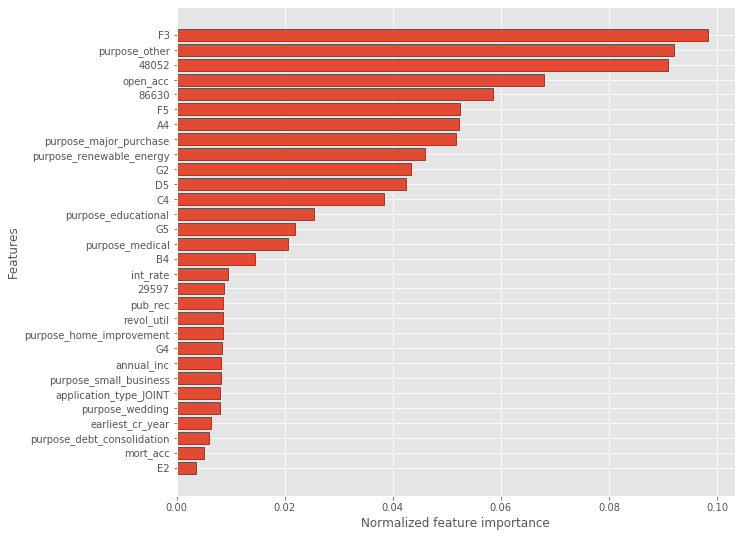

In [200]:
feature_importance_df = pd.DataFrame({'Feature':features,'Importance':rfclf.feature_importances_})
sorted_importance = plot_importance(feature_importance_df)

In [201]:
import sklearn.metrics as metrics
from IPython.display import display, HTML
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, f1_score, confusion_matrix

def metrics_report_to_df(ytrue, ypred):
    """
    format classifier accuracy metrics to a pandas dataframe for printing purposes.
    
    """
    
    precision, recall, fscore, support = metrics.precision_recall_fscore_support(ytrue, ypred, zero_division=1)
    classification_report = pd.concat(map(pd.DataFrame, [precision, recall, fscore, support]), axis=1)
    classification_report.index = class_names
    classification_report.columns = ["precision", "recall", "f1-score", "support"] # Add row w "avg/total"
    classification_report.loc['avg/Total', :] = metrics.precision_recall_fscore_support(ytrue, ypred, average='weighted', zero_division=1)
    classification_report.loc['avg/Total', 'support'] = classification_report['support'].sum() 
    return(classification_report)

def model_report(model_name, y_test, predictions):
    """
    printing confusion matrix in a nice table format.
    
    """
    cm = metrics.confusion_matrix(y_test, predictions)
    confusion_tabular = pd.DataFrame(cm)
    confusion_tabular.columns = ['      Predcited: No ', '      Predcited: Yes']
    confusion_tabular.index = ['Actual: No', 'Actual: Yes']
    confusion_tabular.iloc[0,0] = "TN = " + str(confusion_tabular.iloc[0,0])
    confusion_tabular.iloc[0,1] = "FP = " + str(confusion_tabular.iloc[0,1])
    confusion_tabular.iloc[1,0] = "FN = " + str(confusion_tabular.iloc[1,0])
    confusion_tabular.iloc[1,1] = "TP = " + str(confusion_tabular.iloc[1,1])
    print("\n")
    print (" Consumer Default Prediction using " + model_name + "\n")
    display(HTML(confusion_tabular.to_html()))

    classification_report = metrics_report_to_df(y_test, predictions)
    display(HTML(classification_report.to_html()))
    print("")

In [202]:
from sklearn.metrics import plot_confusion_matrix
def tile_plot_confusion_matrix(model, X_test, y_test, class_names):
    """
    printing confusion matrix in graphic tile format.
    
    """
    # Plot non-normalized confusion matrix
    titles_options = [("Confusion matrix, without normalization", None),
                      ("Normalized confusion matrix", 'true')]
    titles_options = titles_options[1:]
    np.set_printoptions(precision=2)    
    for title, normalize in titles_options:
        disp = plot_confusion_matrix(model, X_test, y_test,
                                     display_labels=class_names,
                                     cmap=plt.cm.Blues,
                                     normalize=normalize)
        disp.ax_.set_title(title)
    plt.show()



 Consumer Default Prediction using Basic RandomForest Classifier



,Predcited: No,Predcited: Yes
Actual: No,TN = 6312,FP = 21
Actual: Yes,FN = 831,TP = 741


,precision,recall,f1-score,support
Fully Paid,0.883662,0.996684,0.936776,6333.0
Consumer Default,0.972441,0.471374,0.634961,1572.0
avg/Total,0.901317,0.892220,0.876757,7905.0


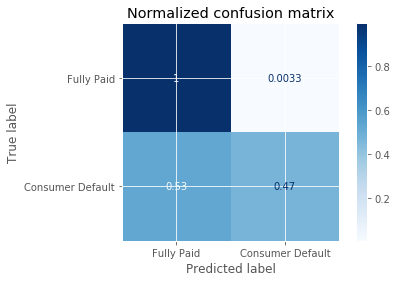

In [203]:
predictions = rfclf.predict(X_test)
model_report('Basic RandomForest Classifier', y_test, predictions)
tile_plot_confusion_matrix(rfclf, X_test, y_test, class_names)

The above model provides high precision and low recall (hit rate) for detecting consumer default. In other words, just 47% of defaulted consumer were identified by our model. In following we will use GridSearchCV to search for the best hyperparameters and tune the model to achive the highest recall score.

First we build a generic classifier and setup a parameter grid to use GridSearchCV and investigate the influence of some tunable parameters. The scoring argument in GridSearchCV is a dictionary enables us to score different models based on precision_score, recall_score, accuracy_score, and f1_score. 

In [204]:
clf = RandomForestClassifier(n_jobs=-1)

param_grid = {
    'min_samples_split': [3,10], 
    'max_depth': [5, 15, 25],
    'max_features': [5, 10, 20],
    'class_weight': ['balanced', 'None'] 
}

In [205]:
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score),
    'f1_score': make_scorer(f1_score)
}

The following function uses GridSearchCV to fit multiple classifiers according to the combinations of parameters in the param_grid. The scores from scorers are recorded and will be printed in a table format. The best model (based on the defined score) will be selected and "refit" to the full training data. Also, the confusion matrix in both table format and graphical format is presented using the held out X_test to show performance.

In [206]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
def grid_search_wrapper(classifier, refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    clf = classifier
    skf = StratifiedKFold(n_splits=5)
    grid_search = GridSearchCV(clf, param_grid, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    results = pd.DataFrame(grid_search.cv_results_)
    results = results.sort_values(by=('mean_test_' + refit_score), ascending=False)

    list_param = list(param_grid.keys())
    columns = ['mean_test_precision_score', 'mean_test_recall_score', 'mean_test_accuracy_score'] + [('param_' + str) for str in list_param]
    results[columns].round(3).head()
    display(HTML((results[columns].round(3).head()).to_html()))

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    model_report("Best of GridSearchCV", y_test, y_pred)
    tile_plot_confusion_matrix(grid_search, X_test, y_test, class_names)
    return grid_search

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_min_samples_split,param_max_depth,param_max_features,param_class_weight
1,0.446,0.779,0.763,10,5,5,balanced
2,0.448,0.770,0.765,3,5,10,balanced
0,0.452,0.767,0.768,3,5,5,balanced
3,0.463,0.752,0.777,10,5,10,balanced
4,0.466,0.750,0.778,3,5,20,balanced


Best params for recall_score
{'class_weight': 'balanced', 'max_depth': 5, 'max_features': 5, 'min_samples_split': 10}


 Consumer Default Prediction using Best of GridSearchCV



,Predcited: No,Predcited: Yes
Actual: No,TN = 4925,FP = 1408
Actual: Yes,FN = 364,TP = 1208


,precision,recall,f1-score,support
Fully Paid,0.931178,0.777673,0.847531,6333.0
Consumer Default,0.461774,0.768448,0.576886,1572.0
avg/Total,0.837831,0.775838,0.793710,7905.0


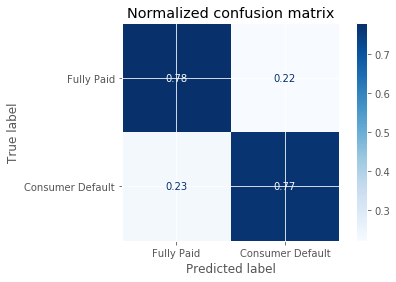

In [207]:
grid_search_ran_forest = grid_search_wrapper(clf, refit_score='recall_score')

The precision, recall, and accuracy scores for every combination of the parameters in param_grid are stored in cv_results_. Here, a pandas DataFrame helps visualize the scores and parameters for each classifier iteration. 

### Threshold-tuning and Trade offs :

In a binary classification problem with class labels 0 and 1, a default threshold of 0.5 is usually used. It means the cases with predicted probabilities less than the threshold of 0.5 are assigned to class 0 and values greater than or equal to 0.5 are assigned to class 1.

The problem is that the default threshold may not represent an optimal interpretation of the predicted probabilities. This might be the case for a number of reasons, such as severely skewed class distribution or if the cost of one type of misclassification is more important than another type of misclassification.


Tuning or shifting the decision threshold in order to accommodate the broader requirements of the classification problem is generally referred to as “threshold-moving,” “threshold-tuning,” or simply “thresholding.”


Obviously, there will be some error associated with every model results in False Positives and False Negatives due to the model classifying things incorrectly as compared to the actual class. There might be the cases where we might want to minimise either False Positives or False negatives depends on the business needs and the context of the problem. Modifying the decision threshold of the model is basically tradeoff between sensitivity and specificty which can be visualized by using precision_recall_curve and roc_curve.    


In [208]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

Here adjusted_classes is a simple function to return a modified version of y_scores that was calculated above, only now class labels will be assigned according to the probability threshold t. The other function below plots the precision and recall with respect to the given threshold value, t.

A precision-recall curve focuses on the performance of a classifier on the positive class only. Precision describes how good a model is at predicting the positive clas where Recall is the hit rate of the model. Recall is the same as sensitivity.

A precision-recall curve is plotted by calculating the precision and recall for each threshold. We use the grid_search_ran_forest model and dataset from the previous section and evaluate the probability predictions using a precision-recall curve. The precision_recall_curve() function can be used to calculate the curve, returning the precision and recall scores for each threshold as well as the thresholds used.

Identifying a threshold that results in the best balance of precision and recall is the same as optimizing the F1-score that summarizes the harmonic mean of both measures.

F1-score = (2 * Precision * Recall) / (Precision + Recall)

In the following function, the optimal threshold is calculate by finding the maximum F1-score.

In [209]:
def optimize_thresholds_precision_recall(model_name, model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:, 1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

    """
    plots the precision recall curve and shows the corresponding value for thresholds with highest f1-score.
    """
        
    # convert to f score
    fscore = (2 * precisions * recalls) / (precisions + recalls)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))
    
        
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, thresholds[ix])
    model_report("adjusted_classes", y_test, y_pred_adj)

    # plot the curve    
    fig, axs = plt.subplots(1,2, figsize=(14,6))
    axs[0].plot(thresholds, precisions[:-1], "b--", label="Precision")
    axs[0].plot(thresholds, recalls[:-1], "g-", label="Recall")
    axs[0].legend(loc='best')
    axs[0].set_title('Precision and Recall Scores as a function of the decision threshold')
    axs[0].set(xlabel='Decision Threshold')
    axs[0].set(ylabel='Score')


    axs[1].step(recalls, precisions, color='b', alpha=0.2, where='post')
    axs[1].fill_between(recalls, precisions, step='post', alpha=0.2, color='b')
    axs[1].plot(recalls[ix], precisions[ix], 'v', c='k', markersize=10, label='Best')
    #axs[1].scatter(recalls[ix], precisions[ix], marker='v', color='black', label='Best')   
    axs[1].legend(loc='best')
    axs[1].set_title('Precision and Recall curve')
    axs[1].set(xlabel='Recall')
    axs[1].set(ylabel='Precision')

Best Threshold=0.555599, F-Score=0.648


 Consumer Default Prediction using adjusted_classes



,Predcited: No,Predcited: Yes
Actual: No,TN = 6045,FP = 288
Actual: Yes,FN = 680,TP = 892


,precision,recall,f1-score,support
Fully Paid,0.898885,0.954524,0.925869,6333.0
Consumer Default,0.755932,0.567430,0.648256,1572.0
avg/Total,0.870457,0.877546,0.870663,7905.0


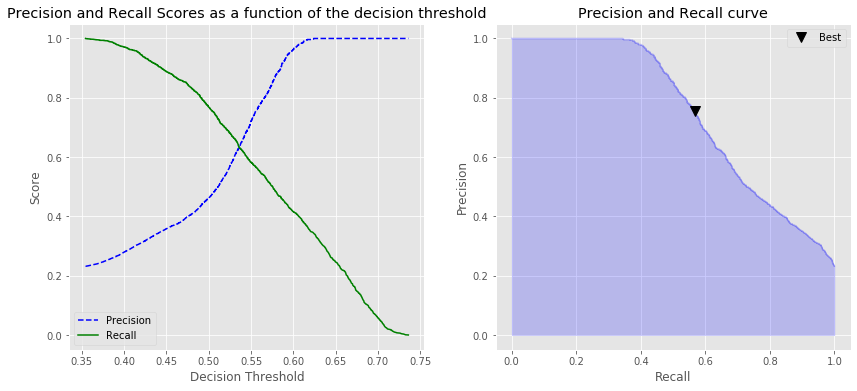

In [210]:
optimize_thresholds_precision_recall("Grid Search Random Forest", grid_search_ran_forest, X_test, y_test)

A ROC (Receiver Operating Characteristic) curve is a diagnostic plot that evaluates a set of probability predictions made by a model on a test dataset using a set of different thresholds. The true positive rate and the false positive rate of the predictions are plotted in a line of increasing thresholds to create a curve. 

A random classifier is presented by a diagonal line on the plot from the bottom-left to top-right indicates the “curve” for a no-skill classifier (predicts the majority class in all cases).

The trade-off in the true-positive rate and false-positive rate for different thresholds is clearly represented in ROC curve. The area under the ROC Curve (ROC-AUC), provides a single number to summarize the performance of a model based on its general capabilities with a value between 0.5 (no-skill) and 1.0 (perfect skill).

A balance between false positive and true positive rates can be acheived by using an optimal threshold on the curve that is closest to the top-left of the plot. Following is one approach to identify the optimal threshold:

Sensitivity = TruePositive / (TruePositive + FalseNegative)
Specificity = TrueNegative / (FalsePositive + TrueNegative)

Where:

Sensitivity = True Positive Rate
Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will find a balance between the sensitivity and the specificity.

G-Mean = sqrt(Sensitivity * Specificity)

One approach would be to test the model with each threshold returned from the call roc_auc_score() and select the threshold with the largest G-Mean value. Given that we have already calculated the Sensitivity (TPR) and the complement to the Specificity when we calculated the ROC Curve, we can calculate the G-Mean for each threshold directly

In [213]:
def optimize_thresholds_roc(model_name, model, X_test, y_test):
    y_scores = model.predict_proba(X_test)[:, 1]
    #precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

    """
    plots the roc curve and shows the corresponding value for thresholds with closest point to the perfect predictor.
    """
    
    # plot the curve
    plt.figure(figsize=(6,6))
    plt.title("ROC Curve")
    fpr, tpr, roc_thresholds = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, linewidth=2, label=str(model_name) + ', AUC = %0.4f' % auc(fpr, tpr))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

    plt.legend(loc='best')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')

    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (roc_thresholds[ix], gmeans[ix]))
    # plot the roc curve for the model
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')    
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, roc_thresholds[ix])
    model_report("adjusted_classes", y_test, y_pred_adj)

Best Threshold=0.505854, G-Mean=0.776


 Consumer Default Prediction using adjusted_classes



,Predcited: No,Predcited: Yes
Actual: No,TN = 5065,FP = 1268
Actual: Yes,FN = 389,TP = 1183


,precision,recall,f1-score,support
Fully Paid,0.928676,0.799779,0.859421,6333.0
Consumer Default,0.482660,0.752545,0.588118,1572.0
avg/Total,0.839981,0.790386,0.805470,7905.0


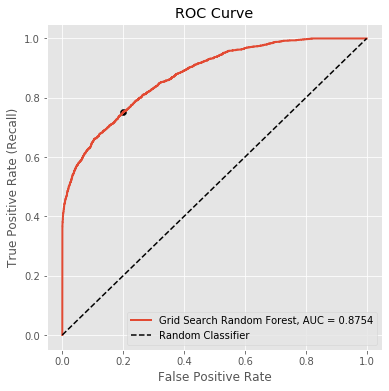

In [215]:
optimize_thresholds_roc("Grid Search Random Forest", grid_search_ran_forest, X_test, y_test)

<a name="Section-6:-Logistic-Regression"></a>
# Section 6: Logistic Regression

Logistic Regression models try to find relationship between the dependent variable (target label to predict) and the one or more independent variables (features), by estimating probabilities using it’s underlying logistic function.

These probabilities will be transformed into binary values using logistic (sigmoid) function in order to actually make a prediction. The Sigmoid-Function is an S-shaped curve that map any real-valued number to a value between the range of 0 and 1, then be transformed into either 0 or 1 using a threshold classifier.


![title](images/logistic_function.png)


Maximum Likelihood Estimation is the process of maximizing the likelihood that a random data point gets classified correctly which is a general approach to estimating parameters in statistical models. The likelihood can be maximized using different methods like an optimization algorithm such as gradient descent or Newton's method.

![linearly_separable_log_reg.png](images/linearly_separable_log_reg.png)



Image source : http://blog.sairahul.com/2014/01/linear-separability.html <br/>

In [216]:
from sklearn.linear_model  import LogisticRegression

In [217]:
clf = LogisticRegression(n_jobs=-1)

param_grid = {
    'C': np.logspace(-3,3,5), 
    'penalty': ["l1","l2", "none"],
    'solver': ['saga', 'newton-cg', 'lbfgs'],
    'class_weight': ['balanced', 'None'] 
}

Let's fine-tune the logistic regression parameters to achieve a model with high recall score:

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_C,param_penalty,param_solver,param_class_weight
80,0.489,0.81,0.794,1000,none,lbfgs,balanced
62,0.489,0.81,0.794,31.6228,none,lbfgs,balanced
26,0.489,0.81,0.794,0.0316228,none,lbfgs,balanced
8,0.489,0.81,0.794,0.001,none,lbfgs,balanced
44,0.489,0.81,0.794,1,none,lbfgs,balanced


Best params for recall_score
{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'none', 'solver': 'lbfgs'}


 Consumer Default Prediction using Best of GridSearchCV



,Predcited: No,Predcited: Yes
Actual: No,TN = 5047,FP = 1286
Actual: Yes,FN = 294,TP = 1278


,precision,recall,f1-score,support
Fully Paid,0.944954,0.796937,0.864657,6333.0
Consumer Default,0.498440,0.812977,0.617988,1572.0
avg/Total,0.856160,0.800127,0.815604,7905.0


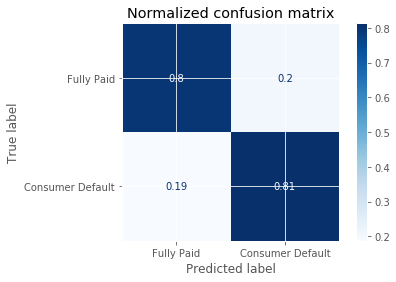

In [218]:
grid_search_logistic_reg = grid_search_wrapper(clf, refit_score='recall_score')

### Threshold-tuning and Trade offs :

Identifying the optimal threshold based on precision-recall curve:

Best Threshold=0.669035, F-Score=0.679


 Consumer Default Prediction using adjusted_classes



,Predcited: No,Predcited: Yes
Actual: No,TN = 5944,FP = 389
Actual: Yes,FN = 563,TP = 1009


,precision,recall,f1-score,support
Fully Paid,0.913478,0.938576,0.925857,6333.0
Consumer Default,0.721745,0.641858,0.679461,1572.0
avg/Total,0.875350,0.879570,0.876858,7905.0


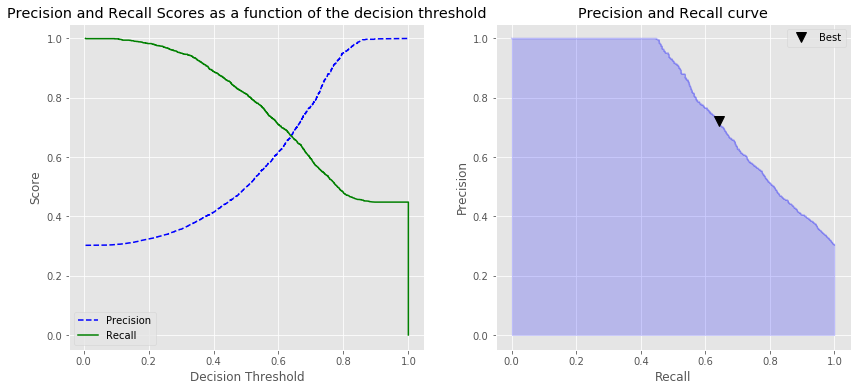

In [219]:
optimize_thresholds_precision_recall("Grid Search Logistic Regression", grid_search_logistic_reg, X_test, y_test)

Identifying the optimal threshold based on ROC curve:

Best Threshold=0.544294, G-Mean=0.809


 Consumer Default Prediction using adjusted_classes



,Predcited: No,Predcited: Yes
Actual: No,TN = 5347,FP = 986
Actual: Yes,FN = 353,TP = 1219


,precision,recall,f1-score,support
Fully Paid,0.938070,0.844308,0.888723,6333.0
Consumer Default,0.552834,0.775445,0.645486,1572.0
avg/Total,0.861462,0.830614,0.840352,7905.0


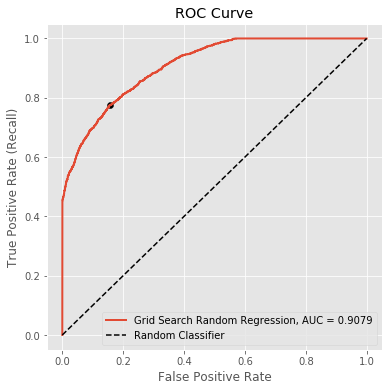

In [220]:
optimize_thresholds_roc("Grid Search Logistic Regression", grid_search_logistic_reg, X_test, y_test)

<a name="Section-7:-KNeighborsClassifier"></a>
# Section 7: KNeighborsClassifier

In [306]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_jobs=-1)
param_grid = {
    'n_neighbors': range(5, 20, 5), 
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

Let's fine-tune the KNeighborsClassifier parameters to achieve a model with high recall score:

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_n_neighbors,param_weights,param_metric
1,0.671,0.392,0.841,5,distance,euclidean
13,0.671,0.392,0.841,5,distance,minkowski
15,0.776,0.355,0.851,10,distance,minkowski
3,0.776,0.355,0.851,10,distance,euclidean
7,0.679,0.379,0.841,5,distance,manhattan


Best params for f1_score
{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}


 Consumer Default Prediction using Best of GridSearchCV



,Predcited: No,Predcited: Yes
Actual: No,TN = 6045,FP = 288
Actual: Yes,FN = 906,TP = 666


,precision,recall,f1-score,support
Fully Paid,0.869659,0.954524,0.910117,6333.0
Consumer Default,0.698113,0.423664,0.527316,1572.0
avg/Total,0.835545,0.848956,0.833993,7905.0


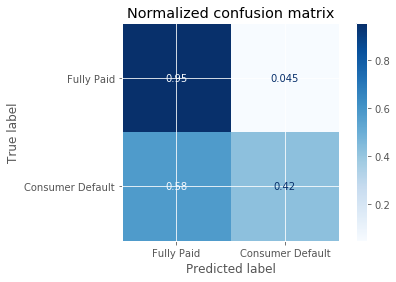

In [307]:
grid_search_KNN = grid_search_wrapper(clf, refit_score='f1_score')

### Threshold-tuning and Trade offs :

Identifying the optimal threshold based on precision-recall curve:


Best Threshold=0.319770, F-Score=0.580


 Consumer Default Prediction using adjusted_classes



,Predcited: No,Predcited: Yes
Actual: No,TN = 5523,FP = 810
Actual: Yes,FN = 599,TP = 973


,precision,recall,f1-score,support
Fully Paid,0.902156,0.872099,0.886873,6333.0
Consumer Default,0.545709,0.618957,0.580030,1572.0
avg/Total,0.831273,0.821758,0.825854,7905.0


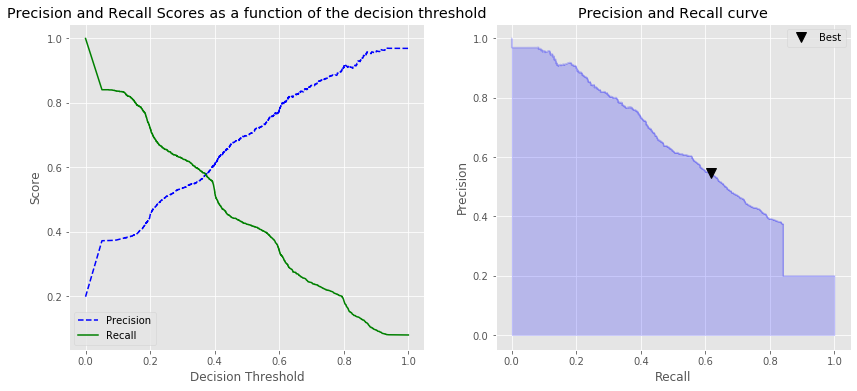

In [308]:
optimize_thresholds_precision_recall("Grid Search KNeighbors Classifier", grid_search_KNN, X_test, y_test)

Identifying the optimimal threshold based on ROC curve:

Best Threshold=0.184771, G-Mean=0.754


 Consumer Default Prediction using adjusted_classes



,Predcited: No,Predcited: Yes
Actual: No,TN = 4686,FP = 1647
Actual: Yes,FN = 364,TP = 1208


,precision,recall,f1-score,support
Fully Paid,0.927921,0.739934,0.823333,6333.0
Consumer Default,0.423117,0.768448,0.545742,1572.0
avg/Total,0.827535,0.745604,0.768131,7905.0


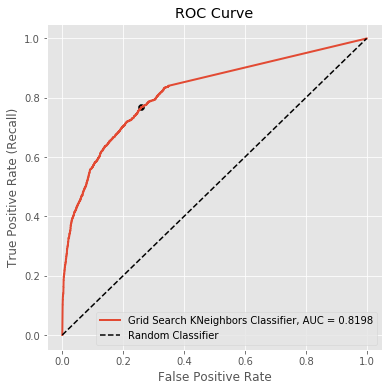

In [309]:
optimize_thresholds_roc("Grid Search KNeighbors Classifier", grid_search_KNN, X_test, y_test)

<a name="Section-8:-Extreme-Gradient-Boost-Model"></a>
# Section 8: Extreme Gradient Boost Model

XGBoost Tree boosting is a highly effective and widely used machine learning method which offers advantages on computational speed and model performance. The three main forms of gradient boosting implementation are:

- Gradient Boosting algorithm also called gradient boosting machine including the learning rate. 
- Stochastic Gradient Boosting with sub-sampling at the row, column and column per split levels. 
- Regularized Gradient Boosting with both L1 and L2 regularization.

Some key algorithm implementation features to make the best use of available resources to train the model include:

- Sparse Aware implementation with automatic handling of missing data values. 
- Block Structure to support the parallelization of tree construction. 
- Continued Training so that you can further boost an already fitted model on new data. 

In the Gradient boosting approach, new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It uses a gradient descent algorithm to minimize the loss when adding new models and that's why it is called gradient boosting because .


### Level-wise Tree Growth
Tree growth is levelwise as shown: 

![level%20wise.png](images/level%20wise.png)
image source: https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/


Link to Paper: http://delivery.acm.org/10.1145/2940000/2939785/p785-chen.pdf?ip=24.180.58.36&id=2939785&acc=CHORUS&key=4D4702B0C3E38B35%2E4D4702B0C3E38B35%2E4D4702B0C3E38B35%2E6D218144511F3437&__acm__=1534839698_b4c1981ee9aff25a9ef1d8394ff10dea

In [221]:
from xgboost import XGBClassifier

In [289]:
clf = XGBClassifier(n_jobs=-1)
param_grid = {
    'n_estimators': [200, 300],
    'max_depth': [5, 10, 20],
    'eval_metric': ['mlogloss']
}

Let's fine-tune the Gradient Boost Model parameters to achieve a model with high recall score:

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_n_estimators,param_max_depth,param_eval_metric
1,0.804,0.511,0.878,300,5,mlogloss
3,0.811,0.503,0.878,300,10,mlogloss
0,0.829,0.501,0.880,200,5,mlogloss
2,0.807,0.500,0.877,200,10,mlogloss
5,0.821,0.492,0.878,300,20,mlogloss


Best params for recall_score
{'eval_metric': 'mlogloss', 'max_depth': 5, 'n_estimators': 300}


 Consumer Default Prediction using Best of GridSearchCV



,Predcited: No,Predcited: Yes
Actual: No,TN = 6142,FP = 191
Actual: Yes,FN = 749,TP = 823


,precision,recall,f1-score,support
Fully Paid,0.891308,0.969841,0.928917,6333.0
Consumer Default,0.811637,0.523537,0.636504,1572.0
avg/Total,0.875464,0.881088,0.870767,7905.0


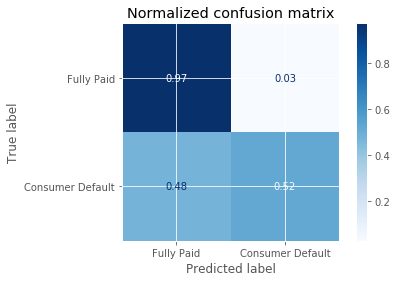

In [290]:
grid_search_XGBClassifier = grid_search_wrapper(clf, refit_score='recall_score')

### Threshold-tuning and Trade offs :

Identifying the optimal threshold based on precision-recall curve:


Best Threshold=0.420102, F-Score=0.643


 Consumer Default Prediction using adjusted_classes



,Predcited: No,Predcited: Yes
Actual: No,TN = 6029,FP = 304
Actual: Yes,FN = 684,TP = 888


,precision,recall,f1-score,support
Fully Paid,0.898108,0.951997,0.924268,6333.0
Consumer Default,0.744966,0.564885,0.642547,1572.0
avg/Total,0.867654,0.875016,0.868245,7905.0


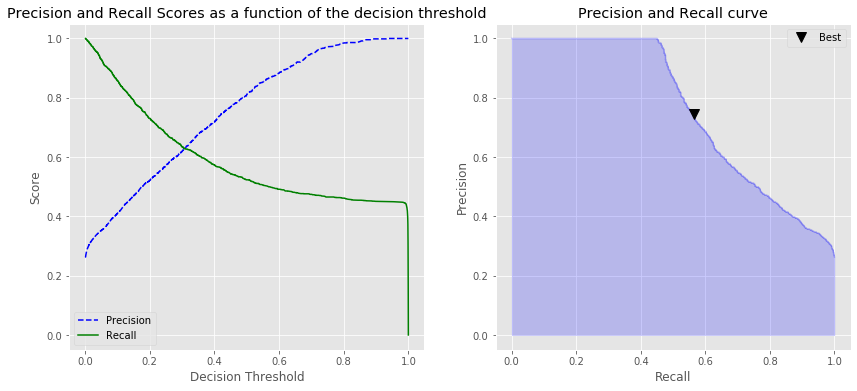

In [291]:
optimize_thresholds_precision_recall("Grid Search Extreme Gradient Boost", grid_search_XGBClassifier, X_test, y_test)

Identifying the optimal threshold based on ROC curve:

Best Threshold=0.174043, G-Mean=0.787


 Consumer Default Prediction using adjusted_classes



,Predcited: No,Predcited: Yes
Actual: No,TN = 5131,FP = 1202
Actual: Yes,FN = 371,TP = 1201


,precision,recall,f1-score,support
Fully Paid,0.932570,0.810201,0.867089,6333.0
Consumer Default,0.499792,0.763995,0.604277,1572.0
avg/Total,0.846507,0.801012,0.814826,7905.0


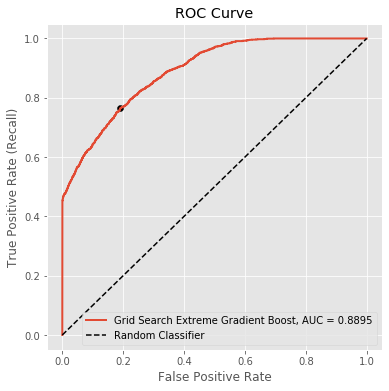

In [292]:
optimize_thresholds_roc("Grid Search Extreme Gradient Boost", grid_search_XGBClassifier, X_test, y_test)

<a name="Section-9:-Naive-Bayes-Classifier"></a>
# Section 9: Naive Bayes Classifier


Naive Bayes Classifier are developed based on on Bayes’ Theorem, assuming an independence among predictors. In other words, the backgorund idea is that the presence of a particular feature in a class is unrelated to the presence of any other feature. e.g. a fruit might be classified an apple if it is red, round, and about 3 inches in diameter even if these features depend on each other or upon the existence of the other features. All of the mentioned properties independently contribute to the probability that this fruit is an apple and that is why it is known as ‘Naive’.

![bayesrule.jpg](images/bayesrule.jpg)

Case example:
![Bayes-rule__20.png](images/Bayes-rule__20.png)
https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/

https://www.geeksforgeeks.org/naive-bayes-classifiers/

In [227]:
from sklearn.naive_bayes import GaussianNB

In [228]:
bayes_class = GaussianNB()
bayes_class.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)



 Consumer Default Prediction using Naive Bayes Classifier



,Predcited: No,Predcited: Yes
Actual: No,TN = 5930,FP = 403
Actual: Yes,FN = 644,TP = 928


,precision,recall,f1-score,support
Fully Paid,0.902038,0.936365,0.918881,6333.0
Consumer Default,0.697220,0.590331,0.639339,1572.0
avg/Total,0.861308,0.867552,0.863291,7905.0


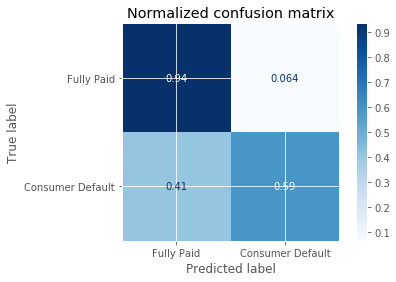

In [229]:
predictions = bayes_class.predict(X_test)
model_report('Naive Bayes Classifier', y_test, predictions)
tile_plot_confusion_matrix(bayes_class, X_test, y_test, class_names)

<a name="Section-10:-Comparison-of-the-Investigated-Classifier"></a>
# Section 10: Comparison of the Investigated Classifier

This section is about a comparison of all investigated classifers in this project. Their performance in terms of F1-score and roc_auc are compared and presented in a box plot format.    

In [310]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
    models = dict()
    models['Logistic Regression'] = grid_search_logistic_reg
    models['K-Nearest Neighbors'] = grid_search_KNN
    models['Random Forest'] = grid_search_ran_forest
    models['Extreme Gradient Boost'] = grid_search_XGBClassifier
    models['Naive Bayes Classifier'] = bayes_class
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y, scoring='accuracy'):
    cv = RepeatedStratifiedKFold(n_splits=4, n_repeats=3, random_state=1)
#    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
#    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    scores = cross_val_score(model, X, y, scoring=scoring, cv=cv)
    return scores

In [311]:
def models_comparison(plot_title, scoring='f1'):
    # get the models to evaluate
    models = get_models()
    # evaluate the models and store results
    results, names = list(), list()
    for name, model in models.items():
        scores = evaluate_model(model, X_test, y_test, scoring=scoring)
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
    # plot model performance for comparison
    pyplot.figure(figsize=(14,6))
    pyplot.title(plot_title)
    pyplot.boxplot(results, labels=names, showmeans=True)
    pyplot.show()

>Logistic Regression 0.615 (0.011)
>K-Nearest Neighbors 0.443 (0.024)
>Random Forest 0.591 (0.014)
>Extreme Gradient Boost 0.623 (0.023)
>Naive Bayes Classifier 0.626 (0.018)


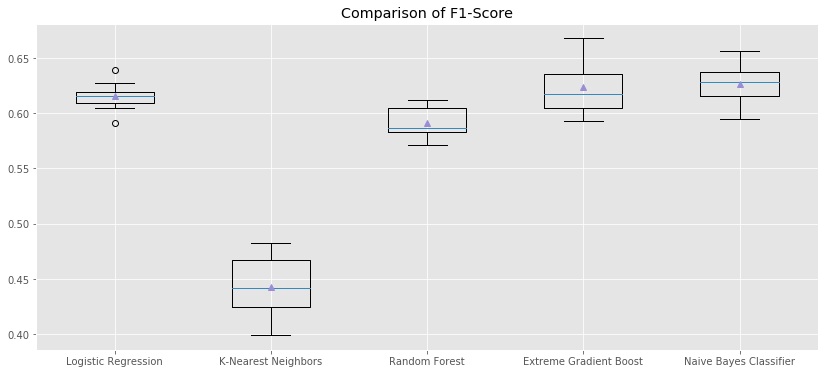

In [312]:
models_comparison("Comparison of F1-Score", scoring='f1')

>Logistic Regression 0.867 (0.111)
>K-Nearest Neighbors 0.770 (0.011)
>Random Forest 0.874 (0.007)
>Extreme Gradient Boost 0.879 (0.007)
>Naive Bayes Classifier 0.865 (0.008)


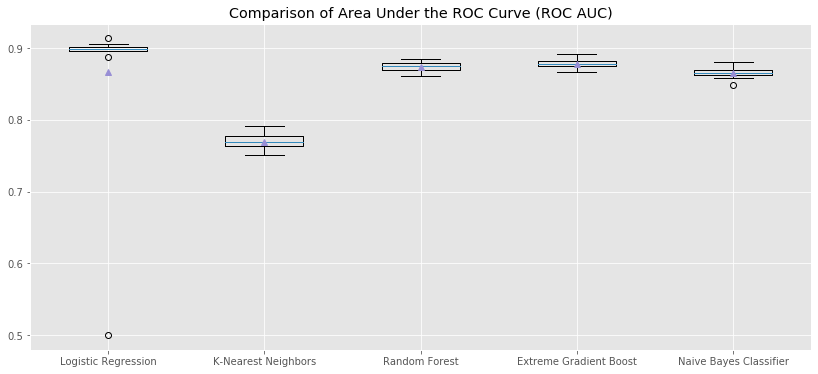

In [313]:
models_comparison("Comparison of Area Under the ROC Curve (ROC AUC)", scoring='roc_auc')